In [ ]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

In [ ]:
from google.colab import drive

# Mount Google Drive
drive.mount('/content/drive')

# Access a file (example: reading a Excel file)
file_path = '/content/drive/My Drive/ITD214/Database_Use/Sephora Reviews - 2021 and 2022_cleanR2.xlsx'
df_merged_cleaned = pd.read_excel(file_path)

Mounted at /content/drive


In [ ]:
#Import dataset
#df_merged_cleaned = pd.read_excel('Sephora Reviews - 2021 and 2022_cleanR2.xlsx')

#print(df_merged_cleaned.info())
#df_merged_cleaned.head()

In [ ]:
# Display the data
df_merged_cleaned.head()

,author_id,rating,is_recommended,helpfulness,loves_count,skin_tone,skin_type,product_id,product_name,product_category,brand_name,variation_type,variation_value,price_usd,size,ingredients,limited_edition,new,online_only,out_of_stock,sephora_exclusive,highlights,size_ml,unit_price
0,10255886039,2,0,0.500000,1081315,light,normal,P420652,Lip Sleeping Mask Intense Hydration with Vitam...,Lip Balms & Treatments - Lip Balms & Treatments,LANEIGE,Color,Original,24.0,0.7 oz/ 20 g,"['Diisostearyl Malate, Hydrogenated Polyisobut...",0,0,0,0,1,"['allure 2019 Best of Beauty Award Winner', 'C...",20.70145,1.159339
1,5049431408,5,1,1.000000,1081315,light,combination,P420652,Lip Sleeping Mask Intense Hydration with Vitam...,Lip Balms & Treatments - Lip Balms & Treatments,LANEIGE,Color,Original,24.0,0.7 oz/ 20 g,"['Diisostearyl Malate, Hydrogenated Polyisobut...",0,0,0,0,1,"['allure 2019 Best of Beauty Award Winner', 'C...",20.70145,1.159339
2,7052423388,4,1,0.333333,1081315,light,combination,P420652,Lip Sleeping Mask Intense Hydration with Vitam...,Lip Balms & Treatments - Lip Balms & Treatments,LANEIGE,Color,Original,24.0,0.7 oz/ 20 g,"['Diisostearyl Malate, Hydrogenated Polyisobut...",0,0,0,0,1,"['allure 2019 Best of Beauty Award Winner', 'C...",20.70145,1.159339
3,23120633832,5,1,0.500000,1081315,fair,dry,P420652,Lip Sleeping Mask Intense Hydration with Vitam...,Lip Balms & Treatments - Lip Balms & Treatments,LANEIGE,Color,Original,24.0,0.7 oz/ 20 g,"['Diisostearyl Malate, Hydrogenated Polyisobut...",0,0,0,0,1,"['allure 2019 Best of Beauty Award Winner', 'C...",20.70145,1.159339
4,5459436029,5,1,0.000000,1081315,light,oily,P420652,Lip Sleeping Mask Intense Hydration with Vitam...,Lip Balms & Treatments - Lip Balms & Treatments,LANEIGE,Color,Original,24.0,0.7 oz/ 20 g,"['Diisostearyl Malate, Hydrogenated Polyisobut...",0,0,0,0,1,"['allure 2019 Best of Beauty Award Winner', 'C...",20.70145,1.159339


In [ ]:
df_merged_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 377736 entries, 0 to 377735
Data columns (total 24 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   author_id          377736 non-null  object 
 1   rating             377736 non-null  int64  
 2   is_recommended     377736 non-null  int64  
 3   helpfulness        377736 non-null  float64
 4   loves_count        377736 non-null  int64  
 5   skin_tone          377736 non-null  object 
 6   skin_type          377736 non-null  object 
 7   product_id         377736 non-null  object 
 8   product_name       377736 non-null  object 
 9   product_category   377736 non-null  object 
 10  brand_name         377736 non-null  object 
 11  variation_type     377736 non-null  object 
 12  variation_value    377736 non-null  object 
 13  price_usd          377736 non-null  float64
 14  size               377736 non-null  object 
 15  ingredients        377736 non-null  object 
 16  li

In [ ]:
# Recategorize skin tone in to Fair, Medium, Tan
# 'skin_tone_deep','skin_tone_fair', 'skin_tone_fairLight', 'skin_tone_light','skin_tone_lightMedium',
#'skin_tone_medium', 'skin_tone_mediumTan','skin_tone_olive', 'skin_tone_porcelain', 'skin_tone_rich','skin_tone_tan',

df_merged_cleaned["skin_tone"].replace (to_replace=["fairLight","light","porcelain","lightMedium", "mediumTan","deep","olive","rich", "dark" ],
                                        value=["fair", "fair","fair","medium", "medium","tan","tan","tan","tan"], inplace=True)

/tmp/ipython-input-1727889696.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_merged_cleaned["skin_tone"].replace (to_replace=["fairLight","light","porcelain","lightMedium", "mediumTan","deep","olive","rich", "dark" ],


In [ ]:
cardinal = pd.DataFrame({
    "column name": df_merged_cleaned.columns.tolist(),
    "data type": [df_merged_cleaned[c].dtype for c in df_merged_cleaned.columns],
    "unique values": [df_merged_cleaned[c].nunique() for c in df_merged_cleaned.columns]
})
print("Cardinality Check Result:")
cardinal

Cardinality Check Result:


,column name,data type,unique values
0,author_id,object,186839
1,rating,int64,5
2,is_recommended,int64,2
3,helpfulness,float64,1346
4,loves_count,int64,2103
5,skin_tone,object,3
6,skin_type,object,4
7,product_id,object,2167
8,product_name,object,2155
9,product_category,object,35


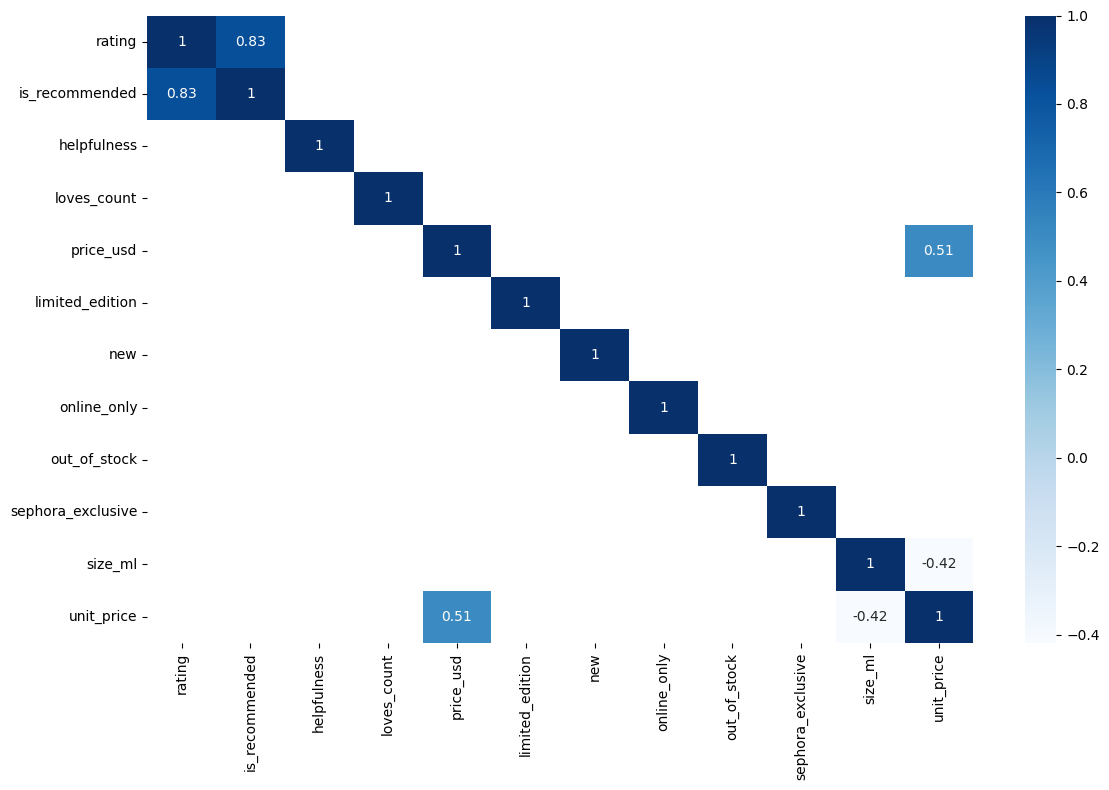

In [ ]:
correlations = df_merged_cleaned.drop(['author_id',"product_id"], axis=1).corr(numeric_only=True)

fig, ax = plt.subplots(figsize=(12,8))
sns.heatmap(correlations[(correlations > 0.30) | (correlations < -0.30)],
            cmap='Blues', annot=True, ax=ax)

plt.tight_layout()
plt.show()

In [ ]:
df_merged_cleaned.columns

Index(['author_id', 'rating', 'is_recommended', 'helpfulness', 'loves_count',
       'skin_tone', 'skin_type', 'product_id', 'product_name',
       'product_category', 'brand_name', 'variation_type', 'variation_value',
       'price_usd', 'size', 'ingredients', 'limited_edition', 'new',
       'online_only', 'out_of_stock', 'sephora_exclusive', 'highlights',
       'size_ml', 'unit_price'],
      dtype='object')

# First Method - PCA on Original Features

In [ ]:
features_full = df_merged_cleaned[['rating', 'is_recommended', 'helpfulness', 'loves_count',
       'skin_tone', 'skin_type','product_category', 'brand_name', 'variation_type', 'variation_value',
       'price_usd', 'size', 'ingredients', 'limited_edition', 'new',
       'online_only', 'out_of_stock', 'sephora_exclusive', 'highlights',
       'size_ml', 'unit_price'] ]

categorical_full = ['skin_tone', 'skin_type', 'product_category', 'variation_type', 'variation_value', 'size']
numerical_full = ['rating', 'is_recommended', 'helpfulness', 'loves_count', 'price_usd', 'limited_edition', 'new',
       'online_only', 'out_of_stock', 'sephora_exclusive','size_ml', 'unit_price']

# One-hot encode categorical
features_full_encoded = pd.get_dummies(features_full[categorical_full], drop_first=True)

In [ ]:
# Combine encoded categoricals with numerical
features_combined_full = pd.concat([features_full[numerical_full], features_full_encoded], axis=1)

In [ ]:
# Scale everything
scaler = StandardScaler()
features_scaled_full = scaler.fit_transform(features_combined_full)

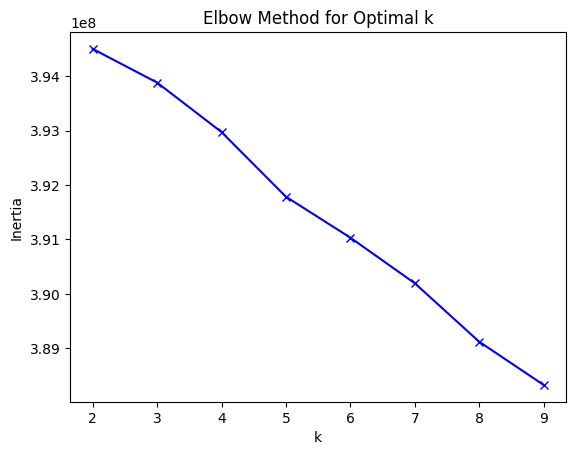

In [ ]:
# Use Elbow method
inertia = []
K = range(2, 10)
for k in K:
    kmeans = KMeans(n_clusters=k, random_state=123, n_init=10)
    kmeans.fit(features_scaled_full)
    inertia.append(kmeans.inertia_)

import matplotlib.pyplot as plt
plt.plot(K, inertia, 'bx-')
plt.xlabel('k')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal k')
plt.show()

# Unable to define the no. of k-clustering using elbow method

In [ ]:
# PCA
from sklearn.decomposition import PCA

pca = PCA().fit(features_scaled_full)

explained_var = pca.explained_variance_ratio_

cumulative = np.cumsum(explained_var)

for i, (var, cum) in enumerate(zip(explained_var, cumulative), start=1):
    print(f"PC{i}: {var:.3f}, cumulative: {cum:.3f}")

### First PCA run shows that the model requires 37 to 40 component to explain 80% to 90% of the variance
### Future run crashes

# Second Method - PCA on Selected Features

In [ ]:
#Feature Selection
features_selected = df_merged_cleaned[['rating','helpfulness', 'loves_count',
       'skin_tone', 'skin_type', "size_ml", 'unit_price', 'limited_edition', "new",
      'online_only', 'sephora_exclusive'] ]


categorical_selected = ['skin_tone', 'skin_type' ]
numerical_selected = ['rating', 'helpfulness','loves_count', "size_ml",'unit_price', 'limited_edition',
        'online_only', 'sephora_exclusive', "new"]

# One-hot encode categorical
features_selected_encoded = pd.get_dummies(features_selected[categorical_selected], drop_first=True)

# Combine encoded categoricals with numerical
features_selected_combined = pd.concat([features_selected[numerical_selected], features_selected_encoded], axis=1)

# Scale everything
scaler = StandardScaler()
features_selected_scaled = scaler.fit_transform(features_selected_combined)

In [ ]:
# Convert features_scaled back to a DataFrame to use .head() and .info()
features_selected_scaled_df = pd.DataFrame(features_selected_scaled, columns=features_selected_combined.columns)
features_selected_scaled_df.head()

,rating,helpfulness,loves_count,size_ml,unit_price,limited_edition,online_only,sephora_exclusive,new,skin_tone_medium,skin_tone_tan,skin_type_dry,skin_type_normal,skin_type_oily
0,-2.117308,0.219623,6.880236,-0.746372,-0.217885,-0.112162,-0.36223,1.274844,-0.128042,-0.754116,-0.265046,-0.493500,2.495543,-0.357438
1,0.606654,1.344666,6.880236,-0.746372,-0.217885,-0.112162,-0.36223,1.274844,-0.128042,-0.754116,-0.265046,-0.493500,-0.400714,-0.357438
2,-0.301333,-0.155392,6.880236,-0.746372,-0.217885,-0.112162,-0.36223,1.274844,-0.128042,-0.754116,-0.265046,-0.493500,-0.400714,-0.357438
3,0.606654,0.219623,6.880236,-0.746372,-0.217885,-0.112162,-0.36223,1.274844,-0.128042,-0.754116,-0.265046,2.026341,-0.400714,-0.357438
4,0.606654,-0.905419,6.880236,-0.746372,-0.217885,-0.112162,-0.36223,1.274844,-0.128042,-0.754116,-0.265046,-0.493500,-0.400714,2.797687


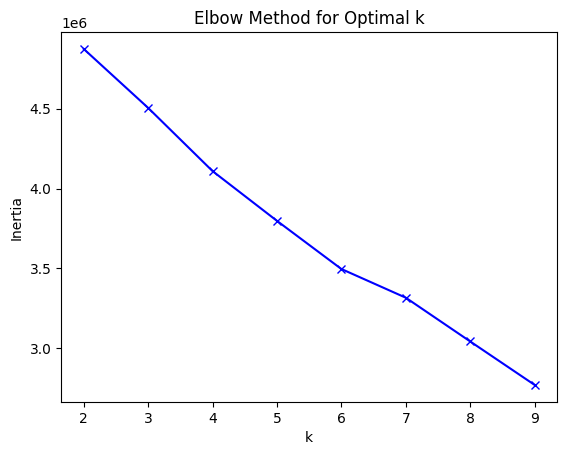

In [ ]:
# Use Elbow method
inertia = []
K = range(2, 10)
for k in K:
  kmeans = KMeans(n_clusters=k, random_state=123, n_init=10)
  kmeans.fit(features_selected_scaled)
  inertia.append(kmeans.inertia_)

# import matplotlib.pyplot as plt
plt.plot(K, inertia, 'bx-')
plt.xlabel('k')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal k')
plt.show()

# Unable to defind the no. of k-clustering using elbow method

In [ ]:
# PCA
from sklearn.decomposition import PCA

pca_selected = PCA().fit(features_selected_scaled)

explained_var_selected = pca_selected.explained_variance_ratio_

cumulative = np.cumsum(explained_var_selected)

for i, (var, cum) in enumerate(zip(explained_var_selected, cumulative), start=1):
    print(f"PC{i}: {var:.3f}, cumulative: {cum:.3f}")

# 10 to 12 components that explains 80 to 90% of total variance

PC1: 0.120, cumulative: 0.120
PC2: 0.094, cumulative: 0.214
PC3: 0.088, cumulative: 0.301
PC4: 0.086, cumulative: 0.387
PC5: 0.082, cumulative: 0.470
PC6: 0.080, cumulative: 0.550
PC7: 0.073, cumulative: 0.623
PC8: 0.063, cumulative: 0.686
PC9: 0.062, cumulative: 0.748
PC10: 0.058, cumulative: 0.806
PC11: 0.056, cumulative: 0.862
PC12: 0.055, cumulative: 0.917
PC13: 0.047, cumulative: 0.963
PC14: 0.037, cumulative: 1.000


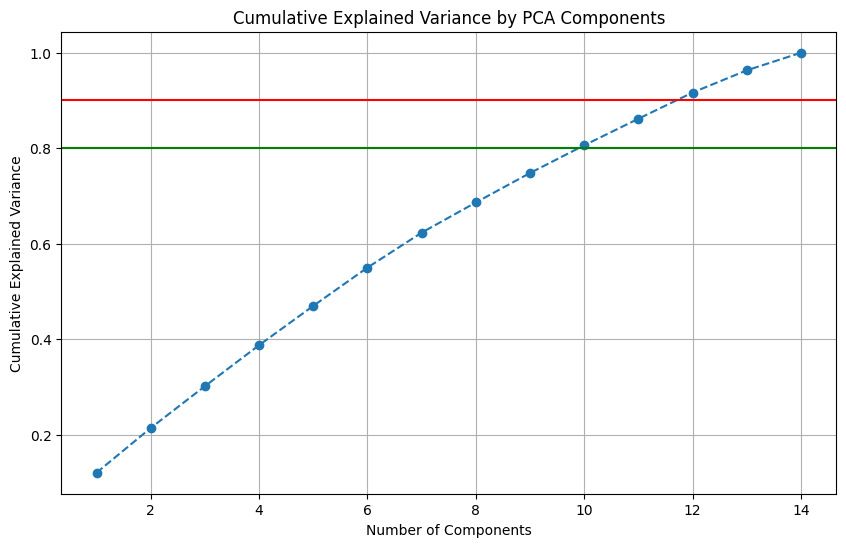

In [ ]:
plt.figure(figsize=(10,6))
plt.plot(
    range(1, len(pca_selected.explained_variance_ratio_) + 1),
    np.cumsum(pca_selected.explained_variance_ratio_),
    marker='o',
    linestyle='--'
)
plt.title('Cumulative Explained Variance by PCA Components')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.axhline(y=0.90, color='r', linestyle='-')   # 90% threshold
plt.axhline(y=0.80, color='g', linestyle='-')   # 80% threshold
plt.grid(True)
plt.show()

In [ ]:
# Reduce to ~10 PCs for clustering (keeps ~80-90% variance)
#pca = PCA(n_components=10)
#features_pca = pca.fit_transform(features_scaled)

In [ ]:
# Run K-Means on full vs PCA features
# Test 2 to 5 clusters

#def test_kmeans(X, label=""):
#    sil_scores = {}
#    for k in range(4, 6):  # test 4–5 clusters
#        kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
#        labels = kmeans.fit_predict(X)
#        sil = silhouette_score(X, labels)
#        sil_scores[k] = sil
#        print(f"{label} k={k}, silhouette={sil:.3f}")
#    best_k = max(sil_scores, key=sil_scores.get)
#    print(f"✅ Best k for {label} = {best_k}\n")
#    return best_k

In [ ]:
#print("🔹 Silhouette Scores (Full Features):")
#best_k_full = test_kmeans(features_scaled, label="Full")

🔹 Silhouette Scores (Full Features):
Full k=2, silhouette=0.105


In [ ]:
#print("🔹 Silhouette Scores (PCA-Reduced Features):")
#best_k_pca = test_kmeans(features_pca, label="PCA")

🔹 Silhouette Scores (PCA-Reduced Features):
PCA k=4, silhouette=0.155
PCA k=5, silhouette=0.161
✅ Best k for PCA = 5



In [ ]:
# Silhouette Score
#for k in range(2, 11):
#    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
#    labels = kmeans.fit_predict(features_scaled)
#    score = silhouette_score(features_scaled, labels)
#    print(f"k={k}, silhouette={score:.3f}")

k=2, silhouette=0.237
k=3, silhouette=0.274


In [ ]:
#from sklearn.decomposition import PCA

#pca = PCA()  # choose number of components
#pca.fit(features_scaled)

PCA()

In [ ]:
#pca.explained_variance_ratio_

array([1.26562605e-01, 1.12181088e-01, 8.73025025e-02, 8.05879793e-02,
       7.85604058e-02, 7.57956235e-02, 7.09404059e-02, 6.83105288e-02,
       5.89770962e-02, 5.75984352e-02, 5.40906050e-02, 5.12654669e-02,
       4.34391987e-02, 3.43726225e-02, 1.54371669e-05])

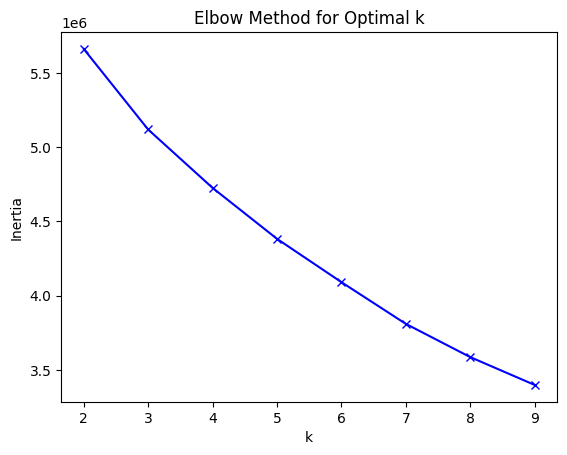

In [ ]:
# Use Elbow method
#inertia = []
#K = range(2, 10)
#for k in K:
#    kmeans = KMeans(n_clusters=k, random_state=123, n_init=10)
#    kmeans.fit(X_pca)
#    inertia.append(kmeans.inertia_)

#import matplotlib.pyplot as plt
#plt.plot(K, inertia, 'bx-')
#plt.xlabel('k')
#plt.ylabel('Inertia')
#plt.title('Elbow Method for Optimal k')
#plt.show()


In [ ]:
# Choose best k
# kmeans = KMeans(n_clusters=7, random_state=123, n_init=10)
# clusters = kmeans.fit_predict(X_pca)

# Add cluster labels back to dataframe
# df_merged_cleaned['cluster'] = clusters
# df_merged_cleaned.head()

,author_id,rating,is_recommended,helpfulness,loves_count,skin_tone,skin_type,product_id,product_name,product_category,brand_name,variation_type,variation_value,price_usd,size,ingredients,limited_edition,new,online_only,out_of_stock,sephora_exclusive,highlights,size_ml,unit_price,cluster
0,10255886039,2,0,0.500000,1081315,fair,normal,P420652,Lip Sleeping Mask Intense Hydration with Vitam...,Lip Balms & Treatments - Lip Balms & Treatments,LANEIGE,Color,Original,24.0,0.7 oz/ 20 g,"['Diisostearyl Malate, Hydrogenated Polyisobut...",0,0,0,0,1,"['allure 2019 Best of Beauty Award Winner', 'C...",20.70145,1.159339,2
1,5049431408,5,1,1.000000,1081315,fair,combination,P420652,Lip Sleeping Mask Intense Hydration with Vitam...,Lip Balms & Treatments - Lip Balms & Treatments,LANEIGE,Color,Original,24.0,0.7 oz/ 20 g,"['Diisostearyl Malate, Hydrogenated Polyisobut...",0,0,0,0,1,"['allure 2019 Best of Beauty Award Winner', 'C...",20.70145,1.159339,1
2,7052423388,4,1,0.333333,1081315,fair,combination,P420652,Lip Sleeping Mask Intense Hydration with Vitam...,Lip Balms & Treatments - Lip Balms & Treatments,LANEIGE,Color,Original,24.0,0.7 oz/ 20 g,"['Diisostearyl Malate, Hydrogenated Polyisobut...",0,0,0,0,1,"['allure 2019 Best of Beauty Award Winner', 'C...",20.70145,1.159339,1
3,23120633832,5,1,0.500000,1081315,fair,dry,P420652,Lip Sleeping Mask Intense Hydration with Vitam...,Lip Balms & Treatments - Lip Balms & Treatments,LANEIGE,Color,Original,24.0,0.7 oz/ 20 g,"['Diisostearyl Malate, Hydrogenated Polyisobut...",0,0,0,0,1,"['allure 2019 Best of Beauty Award Winner', 'C...",20.70145,1.159339,1
4,5459436029,5,1,0.000000,1081315,fair,oily,P420652,Lip Sleeping Mask Intense Hydration with Vitam...,Lip Balms & Treatments - Lip Balms & Treatments,LANEIGE,Color,Original,24.0,0.7 oz/ 20 g,"['Diisostearyl Malate, Hydrogenated Polyisobut...",0,0,0,0,1,"['allure 2019 Best of Beauty Award Winner', 'C...",20.70145,1.159339,1


In [ ]:
#No. of Customer in each cluster
# df_merged_cleaned['cluster'].value_counts()

,count
cluster,
3,113770
1,93820
5,85334
2,48817
4,23827
0,7475
6,4693


ValueError: num must be an integer with 1 <= num <= 10, not 11

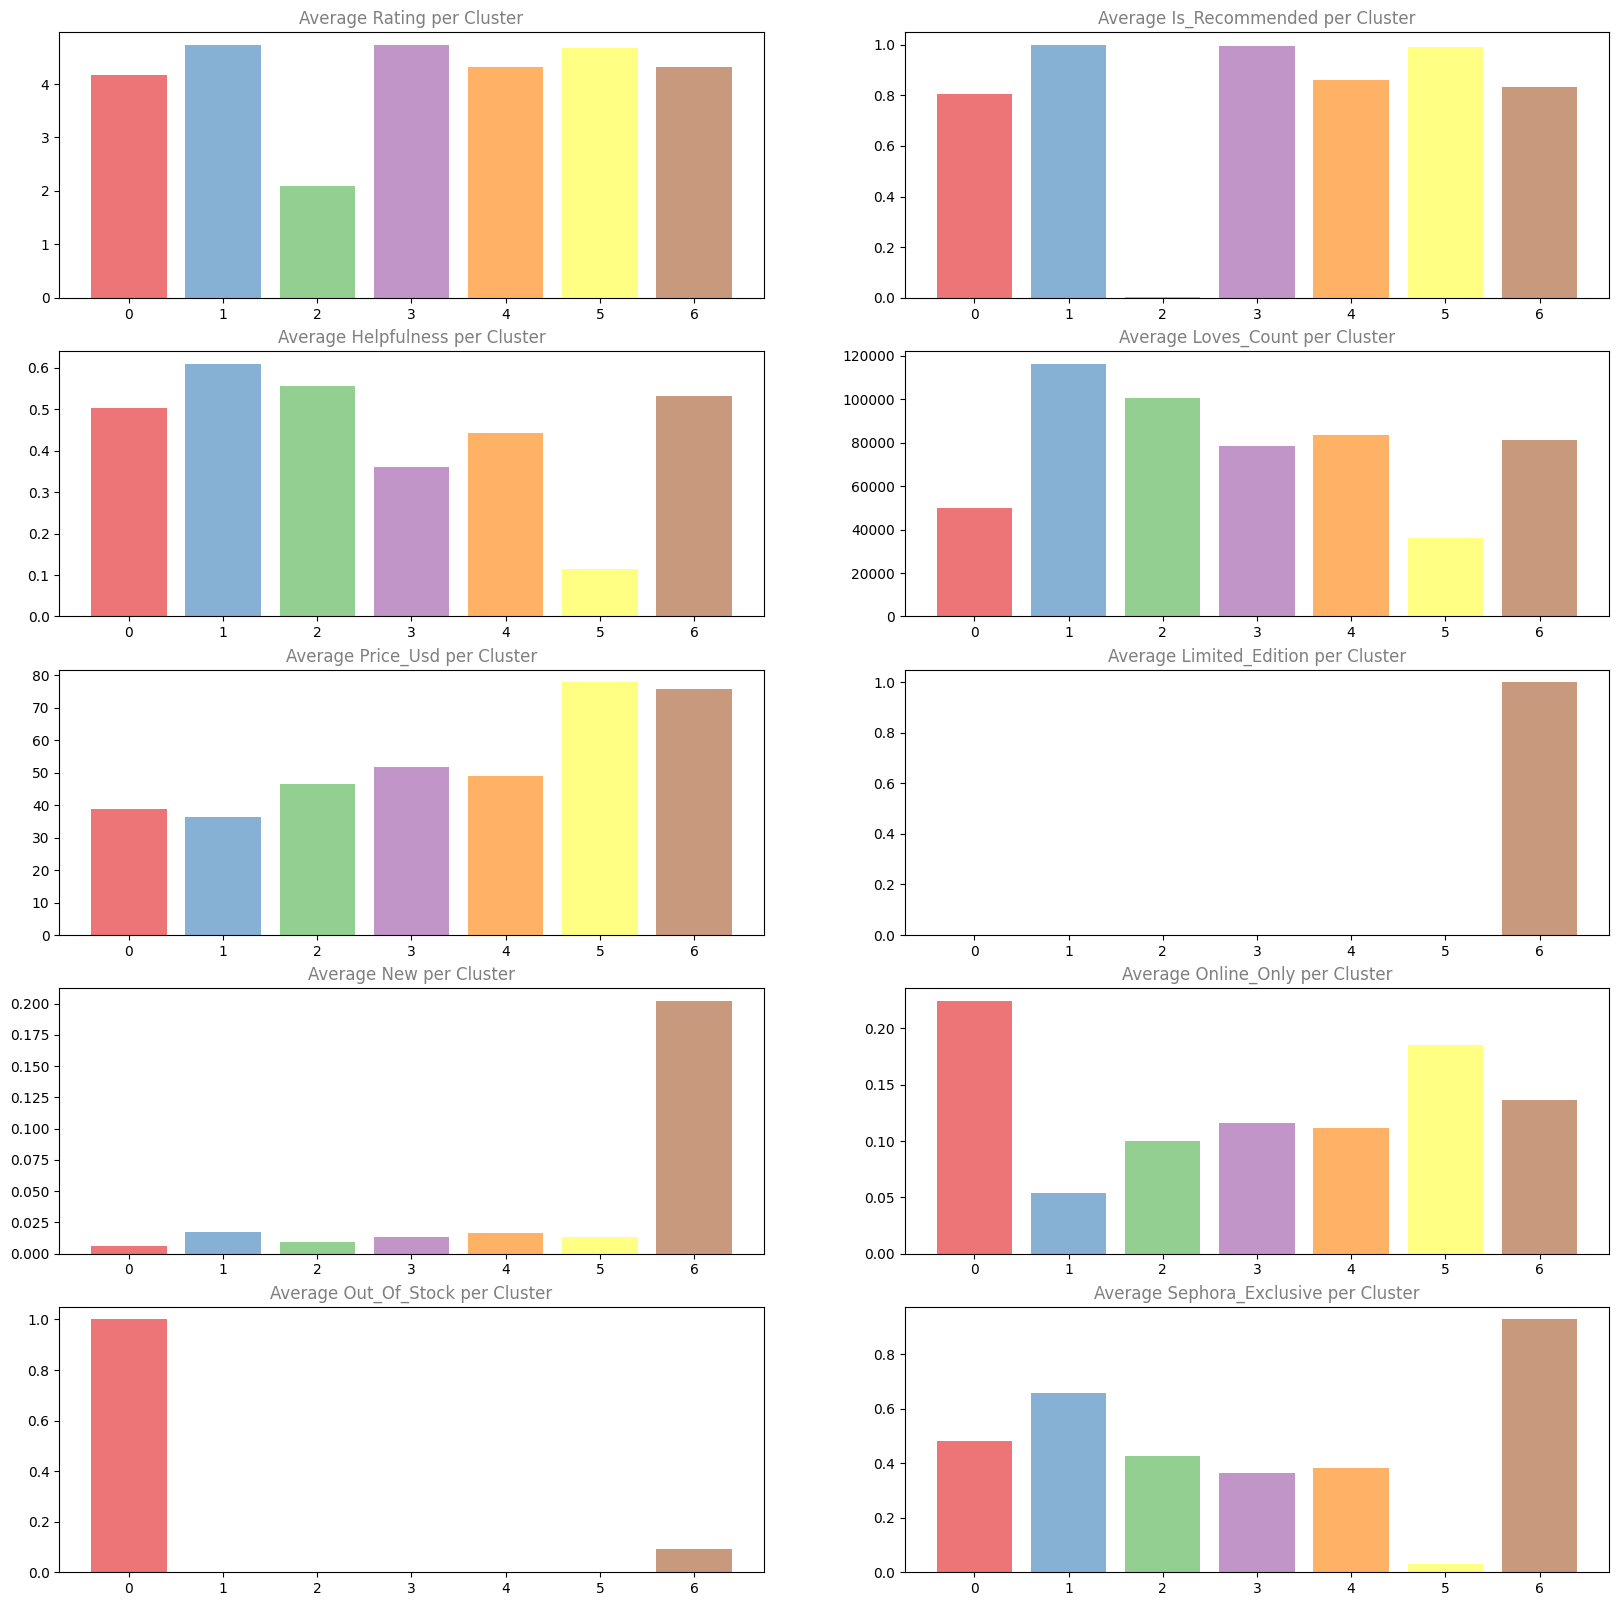

In [ ]:
#numeric_columns = df_merged_cleaned.select_dtypes(include=np.number).drop(['cluster'], axis=1).columns

#fig = plt.figure(figsize=(20, 20))
#for i, column in enumerate(numeric_columns):
#    df_plot = df_merged_cleaned.groupby('cluster')[column].mean()
#    ax = fig.add_subplot(5, 2, i+1)
#    ax.bar(df_plot.index, df_plot, color=sns.color_palette('Set1'), alpha=0.6)
#    ax.set_title(f'Average {column.title()} per Cluster', alpha=0.5)
#    ax.xaxis.grid(False)

#plt.tight_layout()
#plt.show()

In [ ]:
# from sklearn.feature_selection import VarianceThreshold

# selector = VarianceThreshold(threshold=0.01)  # remove near-constant features
# X_selected = selector.fit_transform(features_scaled)

# Get boolean mask of selected features
# mask = selector.get_support()

# Get names of selected features
# selected_features = features_full_encoded.columns[selector.get_support()]
# print(selected_features)

Index(['rating', 'is_recommended', 'helpfulness', 'loves_count', 'price_usd',
       'limited_edition', 'new', 'online_only', 'out_of_stock',
       'sephora_exclusive', 'size_ml', 'unit_price', 'skin_tone_fair',
       'skin_tone_medium', 'skin_tone_tan', 'skin_type_dry',
       'skin_type_normal', 'skin_type_oily'],
      dtype='object')


# Third Method - Aggregrate Features

In [ ]:
numeric_cols = ["rating", "helpfulness", "loves_count", "size_ml", "unit_price",
                "limited_edition", "new", "online_only", "sephora_exclusive"]

for col in numeric_cols:
    df_merged_cleaned[col] = pd.to_numeric(df_merged_cleaned[col], errors="coerce")

# fill NaNs with 0
df_merged_cleaned[numeric_cols] = df_merged_cleaned[numeric_cols].fillna(0)

In [ ]:
# Aggregation
agg_dict = {
    "rating": "mean",                         # average sentiment
    "helpfulness": "mean",                    # average helpfulness per review
    "loves_count": ["sum", "mean"],           # total & avg engagement
    "size_ml": "mean",                        # avg product size
    "unit_price": ["mean", "max"],            # avg spend & luxury threshold
    "limited_edition": "mean",                # % of products that are limited edition
    "new": "mean",                            # % of new releases
    "online_only": "mean",                    # % of online-only purchases
    "sephora_exclusive": "mean"               # % of exclusives
}

In [ ]:
# Group by customer
customer_profiles = df_merged_cleaned.groupby("author_id").agg(agg_dict)
customer_profiles.head()

rating helpfulness loves_count               size_ml unit_price  \
            mean        mean         sum      mean        mean       mean   
author_id                                                                   
681955       5.0      0.0000        5368    5368.0  118.294000   0.355048   
763948       5.0      1.0000      101158  101158.0   49.979215   1.074094   
1068565      5.0      0.9375       12668   12668.0   49.979215   1.074094   
1096829      4.0      0.0000        6410    3205.0   39.776358   2.062457   
1199154      5.0      1.0000       19213   19213.0   50.274950   1.292890   

                    limited_edition  new online_only sephora_exclusive  
                max            mean mean        mean              mean  
author_id                                                               
681955     0.355048             0.0  0.0         1.0               0.0  
763948     1.074094             0.0  0.0         0.0               0.0  
1068565    1.074094             0.0  0.0         0.0               0.0  
1096829    2.164100             0.0  0.0         1.0               0.0  
1199154    1.292890             0.0  0.0         0.0               0.0

count    186839.000000
mean          2.021719
std           3.159697
min           1.000000
25%           1.000000
50%           1.000000
75%           2.000000
max         195.000000
Name: review_count, dtype: float64


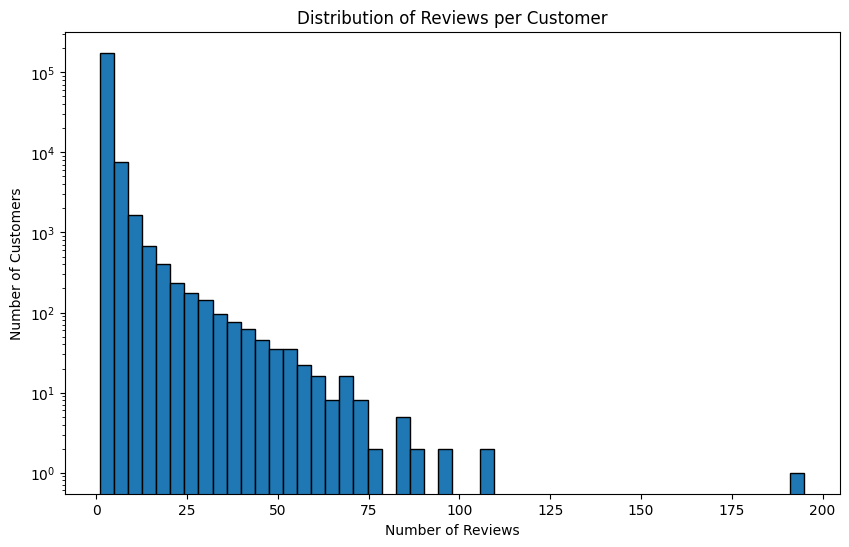

          author_id  review_count
73388    1696370280           195
94461    2330399812           108
135492   5060164185           107
68411    1492711942            96
59621   12640060683            96
89137    2231701489            87
167785   7375781965            87
48321   10690040573            85
156441   6341243385            84
102638  24998050674            84


In [ ]:
# Count reviews per customer
review_counts = df_merged_cleaned.groupby("author_id").size().reset_index(name="review_count")

# Quick stats
print(review_counts["review_count"].describe())

# Histogram (distribution of review counts)
plt.figure(figsize=(10,6))
plt.hist(review_counts["review_count"], bins=50, edgecolor="black")
plt.title("Distribution of Reviews per Customer")
plt.xlabel("Number of Reviews")
plt.ylabel("Number of Customers")
plt.yscale("log")  # log scale if skewed (few customers with many reviews)
plt.show()

# Top customers (power reviewers)
print(review_counts.sort_values("review_count", ascending=False).head(10))

In [ ]:
# Flatten MultiIndex column names
customer_profiles.columns = [
    "_".join(col).strip() if isinstance(col, tuple) else col
    for col in customer_profiles.columns.values
]

In [ ]:
# Add review count
customer_profiles["review_count"] = df_merged_cleaned.groupby("author_id").size()

customer_profiles.head()

,rating_mean,helpfulness_mean,loves_count_sum,loves_count_mean,size_ml_mean,unit_price_mean,unit_price_max,limited_edition_mean,new_mean,online_only_mean,sephora_exclusive_mean,review_count
author_id,,,,,,,,,,,,
681955,5.0,0.0000,5368,5368.0,118.294000,0.355048,0.355048,0.0,0.0,1.0,0.0,1
763948,5.0,1.0000,101158,101158.0,49.979215,1.074094,1.074094,0.0,0.0,0.0,0.0,1
1068565,5.0,0.9375,12668,12668.0,49.979215,1.074094,1.074094,0.0,0.0,0.0,0.0,1
1096829,4.0,0.0000,6410,3205.0,39.776358,2.062457,2.164100,0.0,0.0,1.0,0.0,2
1199154,5.0,1.0000,19213,19213.0,50.274950,1.292890,1.292890,0.0,0.0,0.0,0.0,1


In [ ]:
# Add categorical features (mode)
customer_profiles["skin_tone"] = df_merged_cleaned.groupby("author_id")["skin_tone"].agg(
    lambda x: x.mode().iloc[0] if not x.mode().empty else None
)
customer_profiles["skin_type"] = df_merged_cleaned.groupby("author_id")["skin_type"].agg(
    lambda x: x.mode().iloc[0] if not x.mode().empty else None
)

In [ ]:
# Reset index so author_id becomes a column
customer_profiles = customer_profiles.reset_index()

In [ ]:
customer_profiles.head()

,author_id,rating_mean,helpfulness_mean,loves_count_sum,loves_count_mean,size_ml_mean,unit_price_mean,unit_price_max,limited_edition_mean,new_mean,online_only_mean,sephora_exclusive_mean,review_count,skin_tone,skin_type
0,681955,5.0,0.0000,5368,5368.0,118.294000,0.355048,0.355048,0.0,0.0,1.0,0.0,1,fair,combination
1,763948,5.0,1.0000,101158,101158.0,49.979215,1.074094,1.074094,0.0,0.0,0.0,0.0,1,fair,combination
2,1068565,5.0,0.9375,12668,12668.0,49.979215,1.074094,1.074094,0.0,0.0,0.0,0.0,1,fair,normal
3,1096829,4.0,0.0000,6410,3205.0,39.776358,2.062457,2.164100,0.0,0.0,1.0,0.0,2,fair,combination
4,1199154,5.0,1.0000,19213,19213.0,50.274950,1.292890,1.292890,0.0,0.0,0.0,0.0,1,fair,combination


In [ ]:
# One-hot encode categorical features
categorical = ["skin_tone", "skin_type"]
numerical = [col for col in customer_profiles.columns if col not in ["author_id"] + categorical]

customer_profiles_encoded = pd.get_dummies(customer_profiles, columns=categorical, drop_first=True)

customer_profiles_encoded.head()

,author_id,rating_mean,helpfulness_mean,loves_count_sum,loves_count_mean,size_ml_mean,unit_price_mean,unit_price_max,limited_edition_mean,new_mean,online_only_mean,sephora_exclusive_mean,review_count,skin_tone_medium,skin_tone_tan,skin_type_dry,skin_type_normal,skin_type_oily
0,681955,5.0,0.0000,5368,5368.0,118.294000,0.355048,0.355048,0.0,0.0,1.0,0.0,1,False,False,False,False,False
1,763948,5.0,1.0000,101158,101158.0,49.979215,1.074094,1.074094,0.0,0.0,0.0,0.0,1,False,False,False,False,False
2,1068565,5.0,0.9375,12668,12668.0,49.979215,1.074094,1.074094,0.0,0.0,0.0,0.0,1,False,False,False,True,False
3,1096829,4.0,0.0000,6410,3205.0,39.776358,2.062457,2.164100,0.0,0.0,1.0,0.0,2,False,False,False,False,False
4,1199154,5.0,1.0000,19213,19213.0,50.274950,1.292890,1.292890,0.0,0.0,0.0,0.0,1,False,False,False,False,False


In [ ]:
# Scale Numerical Feature
scaler = StandardScaler()
customer_profiles_encoded[numerical] = scaler.fit_transform(customer_profiles_encoded[numerical])

customer_profiles_encoded.head()

,author_id,rating_mean,helpfulness_mean,loves_count_sum,loves_count_mean,size_ml_mean,unit_price_mean,unit_price_max,limited_edition_mean,new_mean,online_only_mean,sephora_exclusive_mean,review_count,skin_tone_medium,skin_tone_tan,skin_type_dry,skin_type_normal,skin_type_oily
0,681955,0.679455,-1.087023,-0.583936,-0.546910,1.369843,-0.751594,-0.723353,-0.129635,-0.120577,3.066962,-0.851212,-0.323361,False,False,False,False,False
1,763948,0.679455,1.293514,-0.230613,0.036012,-0.187605,-0.277444,-0.381336,-0.129635,-0.120577,-0.392302,-0.851212,-0.323361,False,False,False,False,False
2,1068565,0.679455,1.144730,-0.557010,-0.502487,-0.187605,-0.277444,-0.381336,-0.129635,-0.120577,-0.392302,-0.851212,-0.323361,False,False,False,True,False
3,1096829,-0.191419,-1.087023,-0.580093,-0.560073,-0.420211,0.374298,0.137131,-0.129635,-0.120577,3.066962,-0.851212,-0.006874,False,False,False,False,False
4,1199154,0.679455,1.293514,-0.532869,-0.462658,-0.180863,-0.133166,-0.277264,-0.129635,-0.120577,-0.392302,-0.851212,-0.323361,False,False,False,False,False


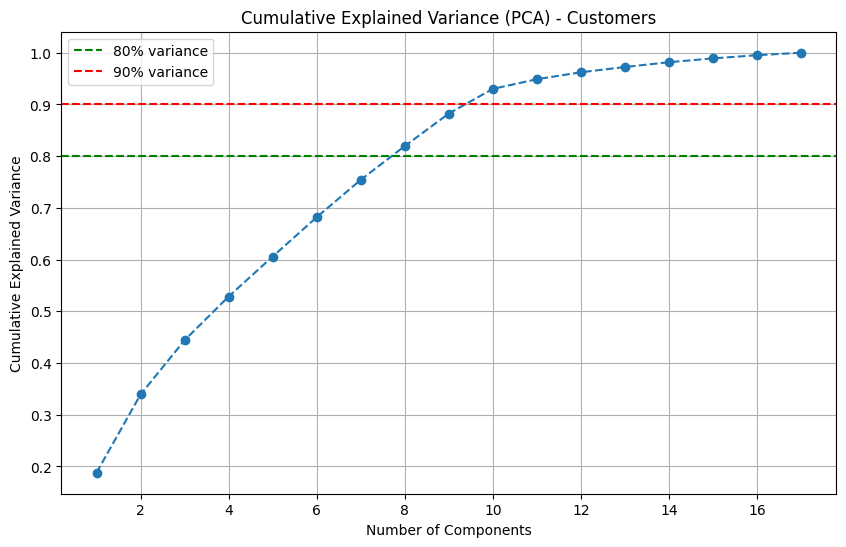

In [ ]:
# PCA to reduce dimensionality
X = customer_profiles_encoded.drop(columns=["author_id"], errors='ignore')  # exclude ID

from sklearn.decomposition import PCA

pca = PCA().fit(X)
explained_var = pca.explained_variance_ratio_
cumulative_var = np.cumsum(explained_var)

plt.figure(figsize=(10,6))
plt.plot(range(1, len(explained_var)+1), cumulative_var, marker='o', linestyle='--')
plt.axhline(y=0.80, color='g', linestyle='--', label='80% variance')
plt.axhline(y=0.90, color='r', linestyle='--', label='90% variance')
plt.title("Cumulative Explained Variance (PCA) - Customers")
plt.xlabel("Number of Components")
plt.ylabel("Cumulative Explained Variance")
plt.grid(True)
plt.legend()
plt.show()

In [ ]:
# Using 8 component
X_pca = PCA(n_components=8).fit_transform(X)

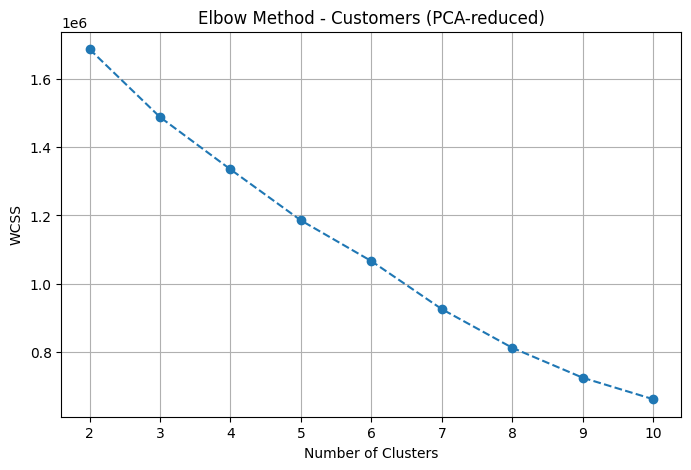

In [ ]:
# Elbow Method to find optimal K
wcss = []
k_range = range(2, 11)
for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(X_pca)
    wcss.append(kmeans.inertia_)

plt.figure(figsize=(8,5))
plt.plot(k_range, wcss, marker='o', linestyle='--')
plt.title("Elbow Method - Customers (PCA-reduced)")
plt.xlabel("Number of Clusters")
plt.ylabel("WCSS")
plt.grid(True)
plt.show()

In [ ]:
for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    labels = kmeans.fit_predict(X_pca)
    sil = silhouette_score(X_pca, labels)
    print(f"k={k}, silhouette score={sil:.3f}")

k=2, silhouette score=0.168
k=3, silhouette score=0.182
k=4, silhouette score=0.200
k=5, silhouette score=0.229
k=6, silhouette score=0.240


KeyboardInterrupt: 

## 5-Clusters

In [ ]:
# Run K-Means with 5 cluster
k = 5
kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)

In [ ]:
customer_profiles["cluster"] = kmeans.fit_predict(X)
customer_profiles.head()

,author_id,rating_mean,helpfulness_mean,loves_count_sum,loves_count_mean,size_ml_mean,unit_price_mean,unit_price_max,limited_edition_mean,new_mean,online_only_mean,sephora_exclusive_mean,review_count,skin_tone,skin_type,cluster
0,681955,5.0,0.0000,5368,5368.0,118.294000,0.355048,0.355048,0.0,0.0,1.0,0.0,1,fair,combination,3
1,763948,5.0,1.0000,101158,101158.0,49.979215,1.074094,1.074094,0.0,0.0,0.0,0.0,1,fair,combination,1
2,1068565,5.0,0.9375,12668,12668.0,49.979215,1.074094,1.074094,0.0,0.0,0.0,0.0,1,fair,normal,1
3,1096829,4.0,0.0000,6410,3205.0,39.776358,2.062457,2.164100,0.0,0.0,1.0,0.0,2,fair,combination,3
4,1199154,5.0,1.0000,19213,19213.0,50.274950,1.292890,1.292890,0.0,0.0,0.0,0.0,1,fair,combination,1


In [ ]:
#No. of Customer in each cluster
customer_profiles['cluster'].value_counts()

,count
cluster,
1,76152
3,66894
0,31283
2,10504
4,2006


ValueError: num must be an integer with 1 <= num <= 10, not 11

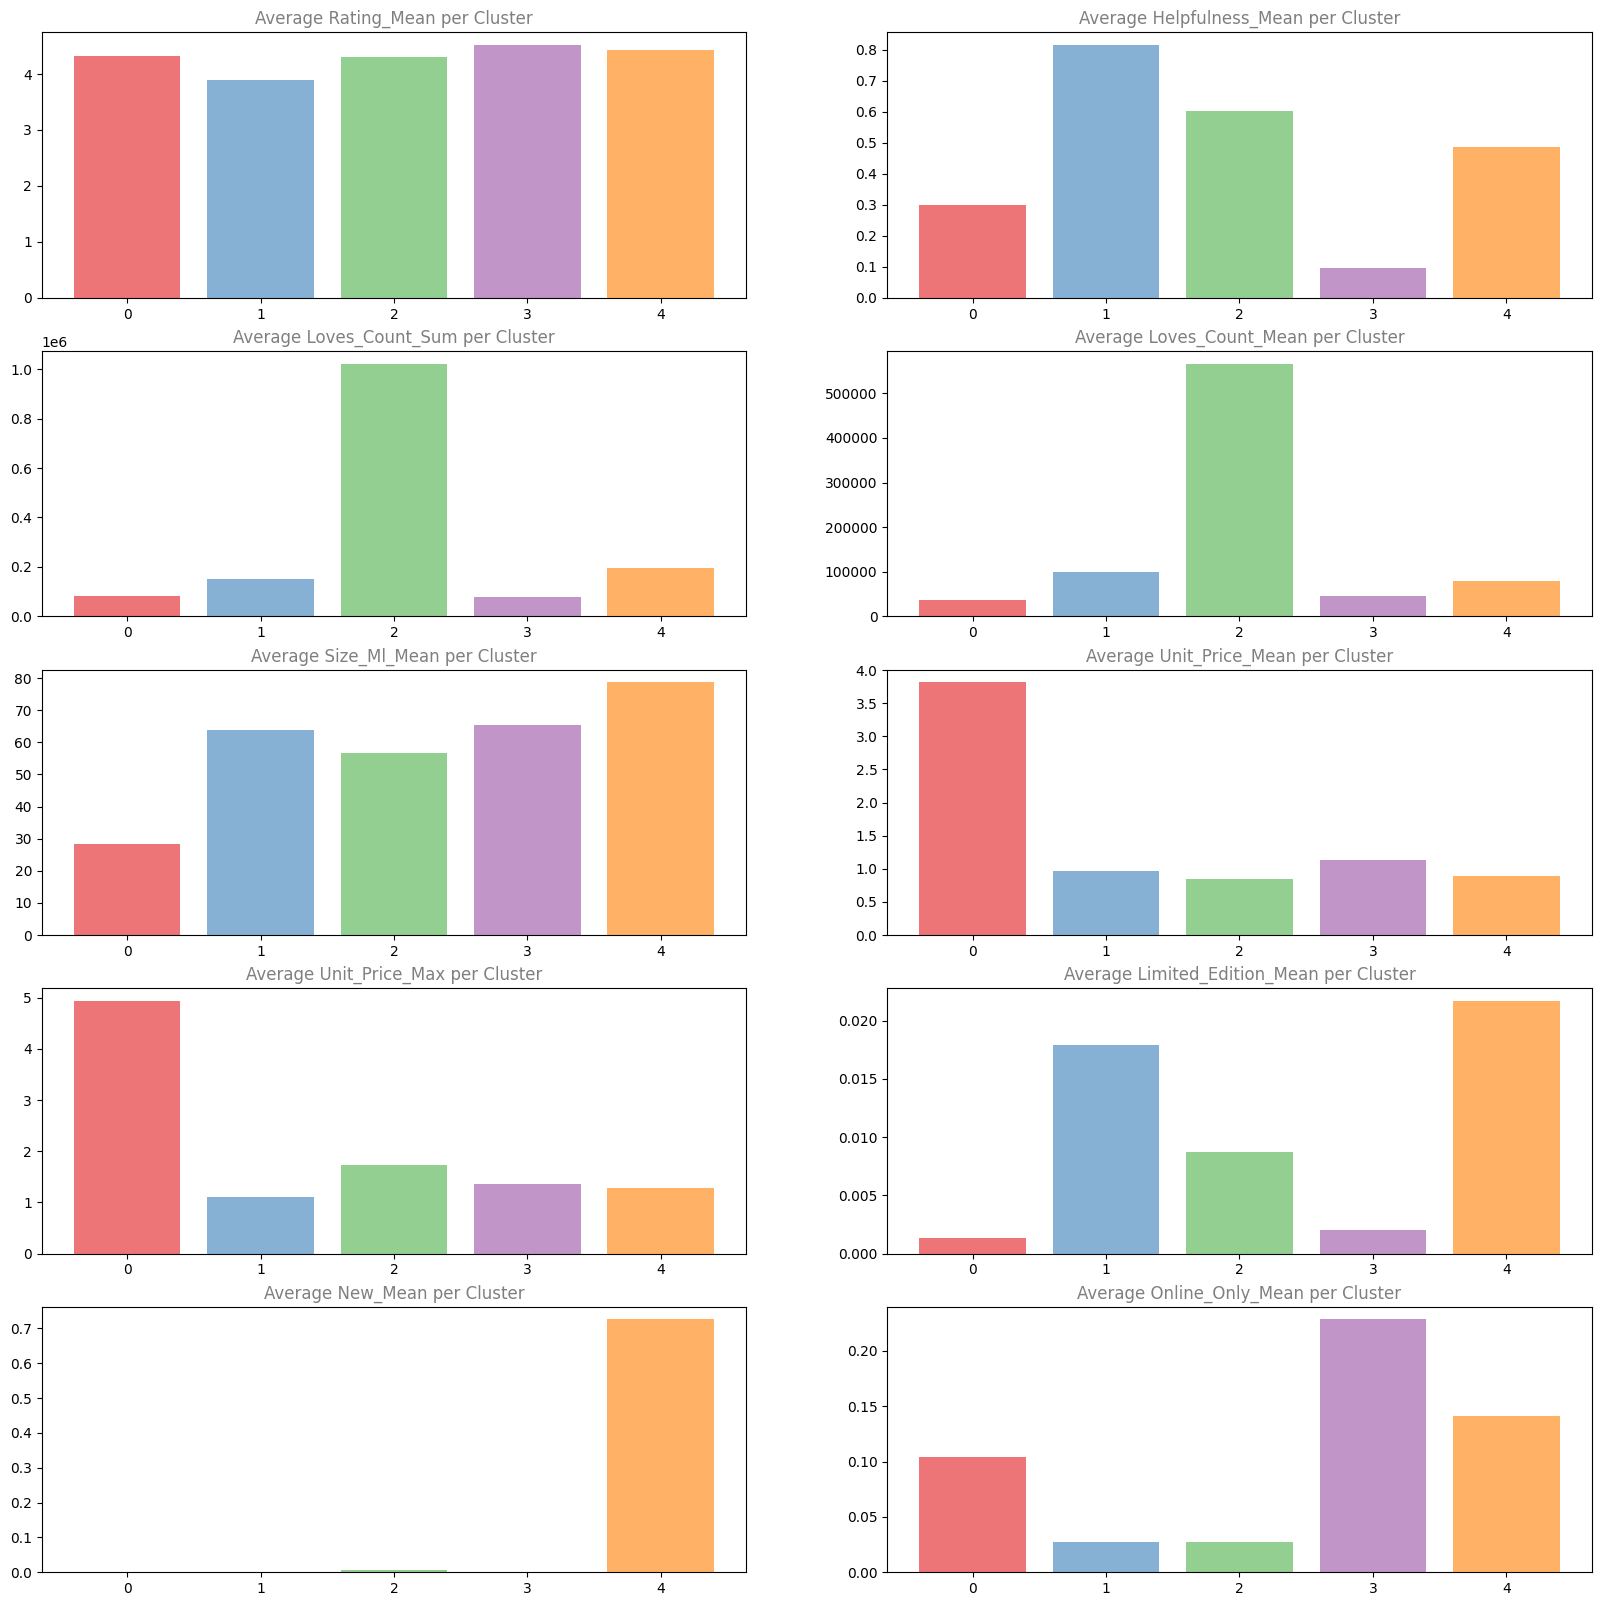

In [ ]:
# numeric_columns =customer_profiles.select_dtypes(include=['number']).drop(['cluster'], axis=1).columns
numeric_columns = customer_profiles.select_dtypes(include=['number']).columns
#numeric_columns = numeric_cols.drop("cluster")

fig = plt.figure(figsize=(20, 20))
for i, column in enumerate(numeric_columns):
    df_plot = customer_profiles.groupby('cluster')[column].mean()
    ax = fig.add_subplot(5, 2, i+1)
    ax.bar(df_plot.index, df_plot, color=sns.color_palette('Set1'), alpha=0.6)
    ax.set_title(f'Average {column.title()} per Cluster', alpha=0.5)
    ax.xaxis.grid(False)
plt.tight_layout()
plt.show()

In [ ]:
# Cluster Summary
# Select numeric columns only and exclude 'cluster'
numeric_cols = customer_profiles.select_dtypes(include=['number']).columns
numeric_cols = numeric_cols.drop("cluster")

# Group by cluster and calculate mean of numeric features
cluster_summary = customer_profiles.groupby("cluster")[numeric_cols].mean().reset_index()

# Sort clusters by a key metric
cluster_summary = cluster_summary.sort_values("unit_price_mean", ascending=False)

print(cluster_summary)

   cluster  rating_mean  helpfulness_mean  loves_count_sum  loves_count_mean  \
0        0     4.319397          0.300638     8.384488e+04      37277.564701   
3        3     4.519443          0.097436     7.962087e+04      45080.401653   
1        1     3.898940          0.815460     1.510539e+05      98489.473767   
4        4     4.435186          0.487531     1.952373e+05      79815.564860   
2        2     4.299979          0.601343     1.022279e+06     566693.325928   

   size_ml_mean  unit_price_mean  unit_price_max  limited_edition_mean  \
0     28.280484         3.818835        4.939655              0.001384   
3     65.462210         1.135795        1.369813              0.001995   
1     63.818083         0.960178        1.097860              0.017889   
4     78.753054         0.894715        1.285121              0.021693   
2     56.548025         0.850821        1.726102              0.008702   

   new_mean  online_only_mean  sephora_exclusive_mean  review_count  
0  0

<Axes: xlabel='skin_type', ylabel='cluster'>

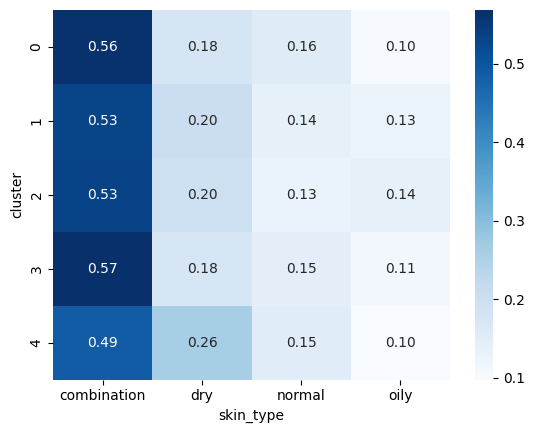

In [ ]:
import seaborn as sns

cluster_cat_pct = customer_profiles.groupby('cluster')['skin_type'].value_counts(normalize=True).unstack(fill_value=0)
sns.heatmap(cluster_cat_pct, annot=True, fmt=".2f", cmap="Blues")

<Axes: xlabel='skin_tone', ylabel='cluster'>

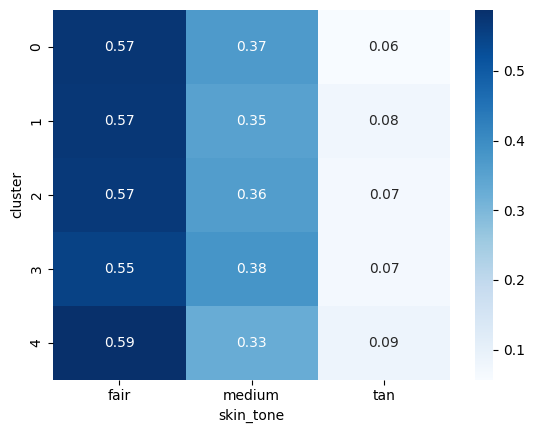

In [ ]:
cluster_cat_pct = customer_profiles.groupby('cluster')['skin_tone'].value_counts(normalize=True).unstack(fill_value=0)
sns.heatmap(cluster_cat_pct, annot=True, fmt=".2f", cmap="Blues")

## 4-Clusters

In [ ]:
k = 4
kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)

In [ ]:
customer_profiles["cluster"] = kmeans.fit_predict(X)
customer_profiles.head()

,author_id,rating_mean,helpfulness_mean,loves_count_sum,loves_count_mean,size_ml_mean,unit_price_mean,unit_price_max,limited_edition_mean,new_mean,online_only_mean,sephora_exclusive_mean,review_count,skin_tone,skin_type,cluster
0,681955,5.0,0.0000,5368,5368.0,118.294000,0.355048,0.355048,0.0,0.0,1.0,0.0,1,fair,combination,0
1,763948,5.0,1.0000,101158,101158.0,49.979215,1.074094,1.074094,0.0,0.0,0.0,0.0,1,fair,combination,1
2,1068565,5.0,0.9375,12668,12668.0,49.979215,1.074094,1.074094,0.0,0.0,0.0,0.0,1,fair,normal,1
3,1096829,4.0,0.0000,6410,3205.0,39.776358,2.062457,2.164100,0.0,0.0,1.0,0.0,2,fair,combination,0
4,1199154,5.0,1.0000,19213,19213.0,50.274950,1.292890,1.292890,0.0,0.0,0.0,0.0,1,fair,combination,1


In [ ]:
#No. of Customer in each cluster
customer_profiles['cluster'].value_counts()

,count
cluster,
1,101863
0,73249
3,9717
2,2010


ValueError: num must be an integer with 1 <= num <= 10, not 11

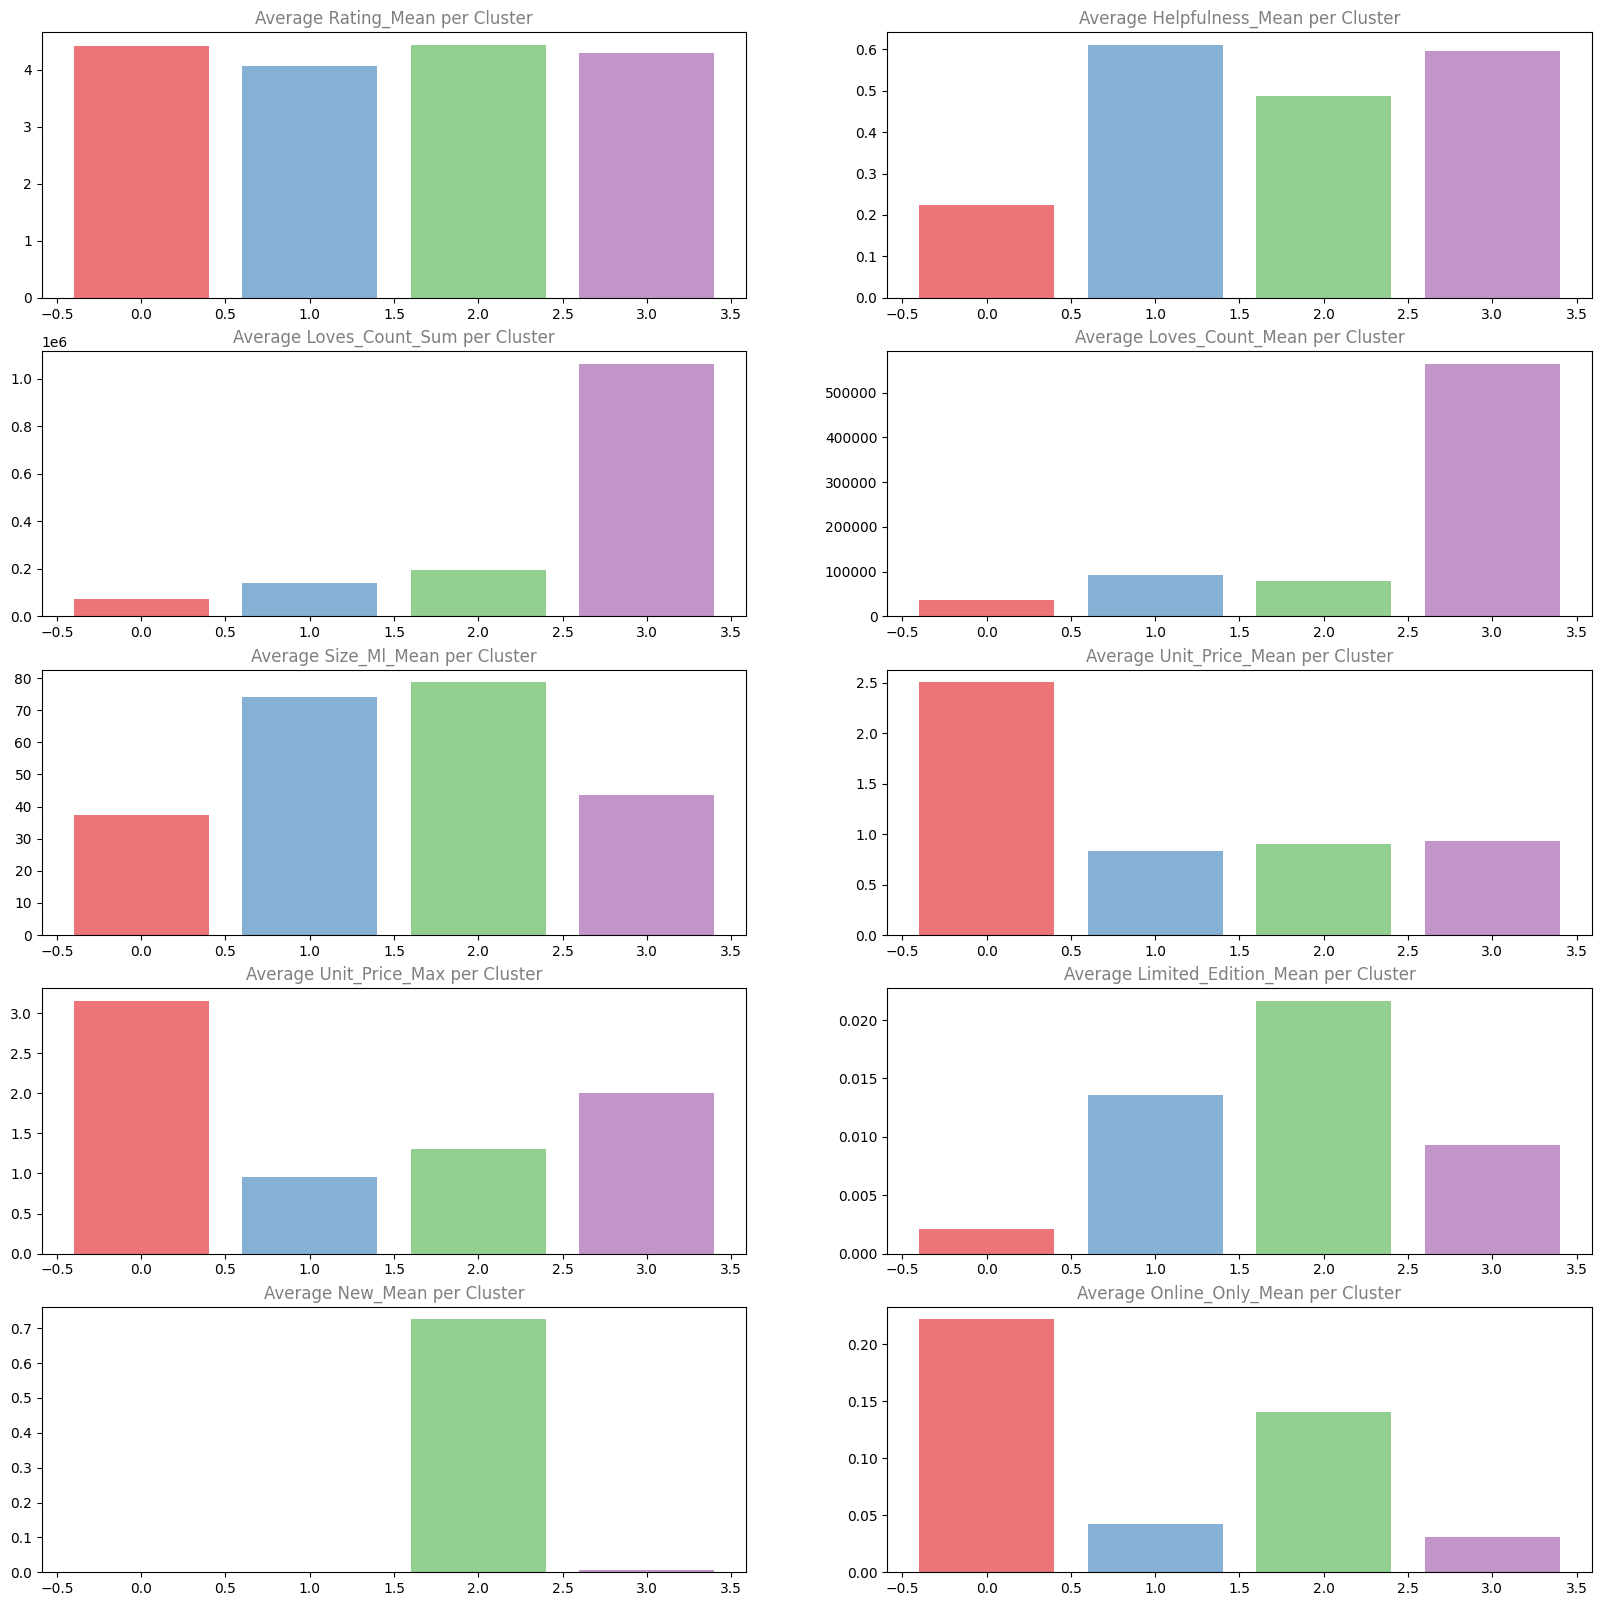

In [ ]:
numeric_columns =customer_profiles.select_dtypes(include=np.number).drop(['cluster'], axis=1).columns

fig = plt.figure(figsize=(20, 20))
for i, column in enumerate(numeric_columns):
    df_plot = customer_profiles.groupby('cluster')[column].mean()
    ax = fig.add_subplot(5, 2, i+1)
    ax.bar(df_plot.index, df_plot, color=sns.color_palette('Set1'), alpha=0.6)
    ax.set_title(f'Average {column.title()} per Cluster', alpha=0.5)
    ax.xaxis.grid(False)
plt.tight_layout()
plt.show()

In [ ]:
# Cluster Summary
# Select numeric columns only and exclude 'cluster'
numeric_cols = customer_profiles.select_dtypes(include=['number']).columns
numeric_cols = numeric_cols.drop("cluster")

# Group by cluster and calculate mean of numeric features
cluster_summary = customer_profiles.groupby("cluster")[numeric_cols].mean().reset_index()

# Sort clusters by a key metric
cluster_summary = cluster_summary.sort_values("unit_price_mean", ascending=False)

print(cluster_summary)

   cluster  rating_mean  helpfulness_mean  loves_count_sum  loves_count_mean  \
0        0     4.419486          0.223608     7.457216e+04      36584.525658   
3        3     4.296309          0.594960     1.064426e+06     565044.750166   
2        2     4.435017          0.487483     1.958501e+05      79866.799930   
1        1     4.064663          0.610389     1.411973e+05      92906.526849   

   size_ml_mean  unit_price_mean  unit_price_max  limited_edition_mean  \
0     37.344599         2.506160        3.152268              0.002078   
3     43.674215         0.928292        1.999284              0.009334   
2     78.699876         0.903561        1.309495              0.021650   
1     74.193158         0.833312        0.957296              0.013621   

   new_mean  online_only_mean  sephora_exclusive_mean  review_count  
0  0.001523          0.221850                0.142883      2.059851  
3  0.007304          0.030703                0.582539      6.733868  
2  0.724851       

<Axes: xlabel='skin_type', ylabel='cluster'>

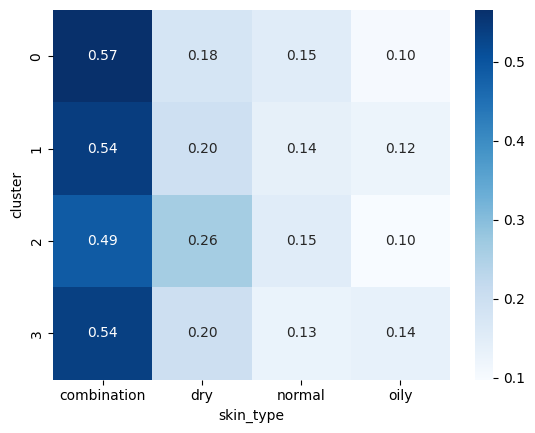

In [ ]:
cluster_cat_pct = customer_profiles.groupby('cluster')['skin_type'].value_counts(normalize=True).unstack(fill_value=0)
sns.heatmap(cluster_cat_pct, annot=True, fmt=".2f", cmap="Blues")

<Axes: xlabel='skin_tone', ylabel='cluster'>

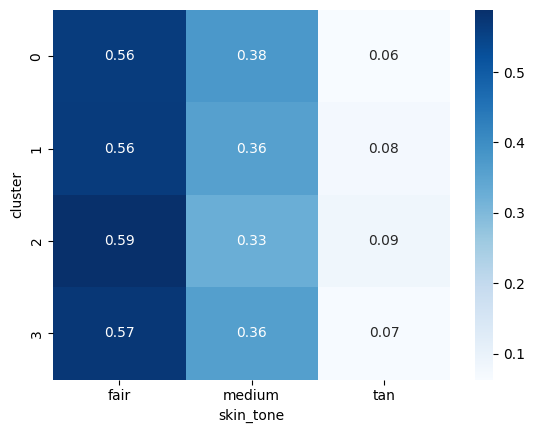

In [ ]:
cluster_cat_pct = customer_profiles.groupby('cluster')['skin_tone'].value_counts(normalize=True).unstack(fill_value=0)
sns.heatmap(cluster_cat_pct, annot=True, fmt=".2f", cmap="Blues")